In [1]:
#Kütüphaneler yüklenir.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import folium

df = pd.read_csv("C:\\Users\\evata\\datascience\\earthquake.csv")
df.head()
#Süreye Bağlı Büyüklük (Md)+++

#Yerel (Lokal) Büyüklük (Ml)

#Yüzey Dalgası Büyüklüğü (Ms)+++

#Cisim Dalgası Büyüklüğü (Mb)+++

#Moment Büyüklüğü (Mw)

#deprem şiddeti (xm) 0.0 değerler için hesaplanmadı demek

,id,date,time,lat,long,country,city,area,direction,dist,depth,xm,md,richter,mw,ms,mb
0,2.000000e+13,2003.05.20,12:17:44 AM,39.04,40.38,turkey,bingol,baliklicay,west,0.1,10.0,4.1,4.1,0.0,NaN,0.0,0.0
1,2.010000e+13,2007.08.01,12:03:08 AM,40.79,30.09,turkey,kocaeli,bayraktar_izmit,west,0.1,5.2,4.0,3.8,4.0,NaN,0.0,0.0
2,1.980000e+13,1978.05.07,12:41:37 AM,38.58,27.61,turkey,manisa,hamzabeyli,south_west,0.1,0.0,3.7,0.0,0.0,NaN,0.0,3.7
3,2.000000e+13,1997.03.22,12:31:45 AM,39.47,36.44,turkey,sivas,kahvepinar_sarkisla,south_west,0.1,10.0,3.5,3.5,0.0,NaN,0.0,0.0
4,2.000000e+13,2000.04.02,12:57:38 AM,40.80,30.24,turkey,sakarya,meseli_serdivan,south_west,0.1,7.0,4.3,4.3,0.0,NaN,0.0,0.0


In [2]:
df["country"].unique()

array(['turkey', 'azerbaijan', 'bulgaria', 'mediterranean', 'greece',
       'georgia ', 'russia', 'iran', 'macedonia', 'aegeansea', 'syria',
       'blacksea', 'cyprus_greek', 'cyprus_turkish', 'iraq', 'romania',
       'turkiye_iran', 'turkiye_armenia', 'turkiye_syria', 'turkiye_iraq',
       'israel', '#NAME?', 'albania', 'ukrainia', 'turkiye_georgia ',
       'egypt'], dtype=object)

In [3]:
#Türkiye bağlı enlem boylam sınırlandırıldı
df = df[df["country"] == "turkey"]

df=df[df["lat"]>=36]
df=df[df["lat"]<=42]
df=df[df["long"]<=45]
df=df[df["long"]>=26]

In [4]:
#toplam bos değer
df.isna().sum()

id              0
date            0
time            0
lat             0
long            0
country         0
city          122
area          114
direction    1697
dist         1697
depth           0
xm              0
md              0
richter         0
mw           9515
ms              0
mb              0
dtype: int64

In [5]:
df.shape


(11646, 17)

In [6]:
df.describe()

,id,lat,long,dist,depth,xm,md,richter,mw,ms,mb
count,1.164600e+04,11646.000000,11646.000000,9949.000000,11646.000000,11646.000000,11646.000000,11646.000000,2131.000000,11646.000000,11646.000000
mean,1.993937e+13,38.719034,33.074871,2.909277,12.823974,3.980551,2.240460,1.761643,4.465040,0.584046,1.408114
std,1.927316e+11,1.283002,5.819983,3.020346,16.188803,0.552820,1.995208,2.069755,1.026253,1.569894,2.038814
min,1.910000e+13,36.000000,26.000000,0.100000,0.000000,3.500000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.980000e+13,37.710000,28.300000,1.400000,5.000000,3.600000,0.000000,0.000000,4.000000,0.000000,0.000000
50%,2.000000e+13,38.750000,30.380000,2.300000,8.450000,3.800000,3.500000,0.000000,4.600000,0.000000,0.000000
75%,2.010000e+13,39.547500,38.700000,3.500000,13.000000,4.200000,3.800000,3.900000,5.000000,0.000000,3.800000
max,2.020000e+13,42.000000,45.000000,67.600000,180.000000,7.900000,7.400000,7.200000,7.700000,7.900000,7.100000


<AxesSubplot:>

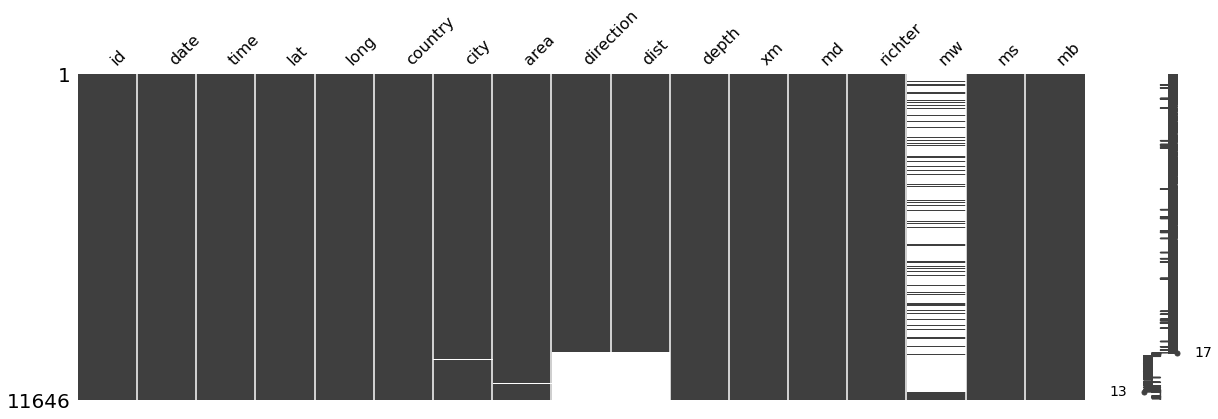

In [7]:
#missingno kayıp verileri bulmak için kurulur
import missingno as mno
mno.matrix(df, figsize = (20, 6))

In [8]:
#mw sutununda cok fazla bos satır bulunduğu için sutun silinir.
df = df.drop(columns= "mw")

In [9]:
df.tail()

,id,date,time,lat,long,country,city,area,direction,dist,depth,xm,md,richter,ms,mb
24002,2.020000e+13,2017.03.10,12:23:42 AM,37.50,38.48,turkey,adiyaman,kirmacik_samsat,NaN,NaN,13.0,4.2,0.0,4.2,0.0,0.0
24003,2.020000e+13,2017.03.10,12:42:44 AM,40.47,35.84,turkey,amasya,kizoglu,NaN,NaN,5.6,3.6,0.0,3.5,0.0,0.0
24004,2.020000e+13,2017.04.05,12:08:11 AM,38.63,27.57,turkey,manisa,cavusoglu,NaN,NaN,10.6,4.1,0.0,4.0,0.0,0.0
24005,2.020000e+13,2017.04.05,12:35:09 AM,38.65,27.55,turkey,manisa,cavusoglu,NaN,NaN,8.7,3.8,0.0,3.6,0.0,0.0
24006,2.020000e+13,2017.04.05,12:25:25 AM,38.63,27.58,turkey,manisa,cavusoglu,NaN,NaN,9.0,3.5,0.0,3.4,0.0,0.0


<AxesSubplot:>

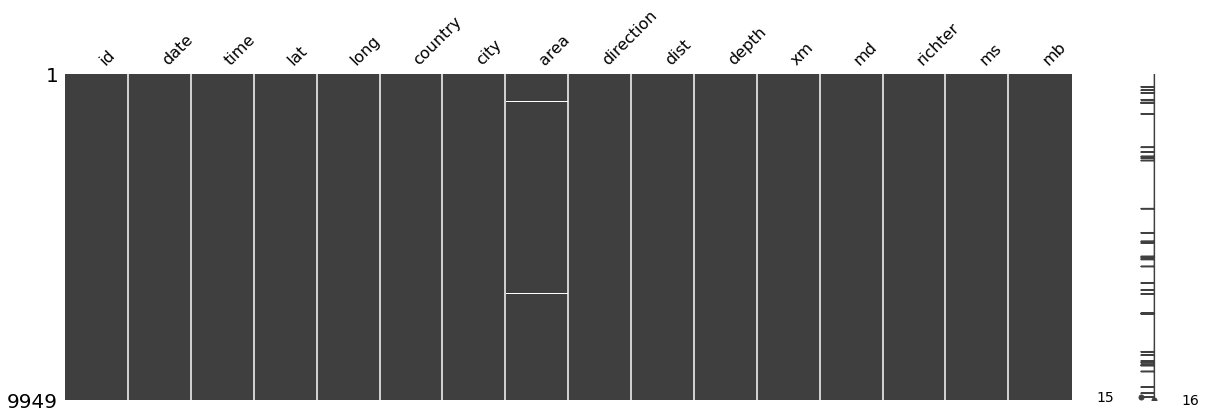

In [10]:
#son 1697 değer bos olduğu için dikkate alınmadı
df=df[:9949]
mno.matrix(df, figsize = (20, 6))

In [11]:
df.isnull().sum()

id            0
date          0
time          0
lat           0
long          0
country       0
city          0
area         36
direction     0
dist          0
depth         0
xm            0
md            0
richter       0
ms            0
mb            0
dtype: int64

In [12]:
#area sutununda bos kısımlar için bilinmiyor eklendi.
df = df.fillna("bilinmiyor")

In [13]:
data = df.copy()

In [14]:
data['time'] = pd.to_datetime(data['time'])
data['time'] = pd.to_numeric(pd.to_datetime(data['time']))


In [15]:
# date sütunu gün yıl ay a ayrılır
data[["year", "month", "day"]] = data["date"].str.split(".", expand = True)

In [16]:
data["year"]= data["year"].astype(int)
data["month"]= data["month"].astype(int)
data["day"]= data["day"].astype(int)

<AxesSubplot:xlabel='long', ylabel='lat'>

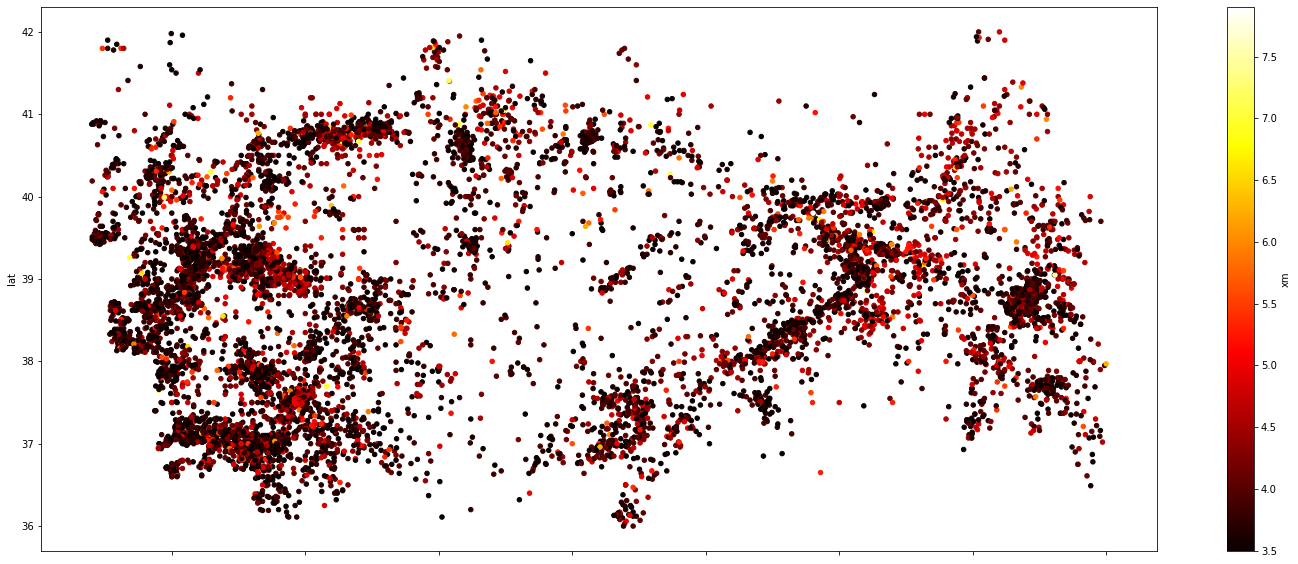

In [17]:
# şiddetine göre haritalanması 
data.plot(x="long", y="lat", kind="scatter", c="xm", colormap="hot",figsize=(25, 10))

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9949 entries, 0 to 10046
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         9949 non-null   float64
 1   date       9949 non-null   object 
 2   time       9949 non-null   int64  
 3   lat        9949 non-null   float64
 4   long       9949 non-null   float64
 5   country    9949 non-null   object 
 6   city       9949 non-null   object 
 7   area       9949 non-null   object 
 8   direction  9949 non-null   object 
 9   dist       9949 non-null   float64
 10  depth      9949 non-null   float64
 11  xm         9949 non-null   float64
 12  md         9949 non-null   float64
 13  richter    9949 non-null   float64
 14  ms         9949 non-null   float64
 15  mb         9949 non-null   float64
 16  year       9949 non-null   int32  
 17  month      9949 non-null   int32  
 18  day        9949 non-null   int32  
dtypes: float64(10), int32(3), int64(1), object(5)
m

In [19]:
import geopandas
from folium import GeoJson
from folium import plugins

In [20]:
lat = np.asarray(data.lat)
lon = np.asarray(data.long)
mag = np.asarray(data.xm)
year = np.asarray(data.year)

mean_lat = data.lat.mean()
mean_lon = data.long.mean()

In [21]:
location = [lat, lon]

In [22]:
m= folium.Map(location=[mean_lat, mean_lon], zoom_start=7)
m

In [23]:
data["lat"]= data["lat"].astype(float)
data["long"]= data["long"].astype(float)
data["xm"]= data["xm"].astype(float)
data["year"]= data["year"].astype(int)

In [24]:
for idx in range(len(lat)):
    marker = folium.CircleMarker(
        location=[lat[idx],lon[idx]],
        radius=mag[idx]**5/2500,
        color='Red',
        popup=f'lat: {lat[idx]}, long: {lon[idx]} , year: {year[idx]}',
        tooltip=f'Magnitude: {mag[idx]}')
    marker.add_to(m)
# deprem şiddetine göre çap büyüyen haritalandırma

In [25]:
import fiona
import pandas as pd
import geopandas
import geopandas as gpd

In [26]:
import geopandas as gpd
gdf = gpd.read_file('C:\\Users\\evata\\datascience\\Turkey_shapefile\\tr_10km.shp')
json = gpd.GeoSeries([gdf.geometry.iloc[0]]).__geo_interface__
# türkiye sınırları için shp dosyası 

In [27]:
data_map_geo = geopandas.GeoDataFrame(
    data, geometry=geopandas.points_from_xy(data.long, data.lat))

In [28]:
data_map_geo

,id,date,time,lat,long,country,city,area,direction,dist,depth,xm,md,richter,ms,mb,year,month,day,geometry
0,2.000000e+13,2003.05.20,1669681064000000000,39.04,40.38,turkey,bingol,baliklicay,west,0.1,10.0,4.1,4.1,0.0,0.0,0.0,2003,5,20,POINT (40.38000 39.04000)
1,2.010000e+13,2007.08.01,1669680188000000000,40.79,30.09,turkey,kocaeli,bayraktar_izmit,west,0.1,5.2,4.0,3.8,4.0,0.0,0.0,2007,8,1,POINT (30.09000 40.79000)
2,1.980000e+13,1978.05.07,1669682497000000000,38.58,27.61,turkey,manisa,hamzabeyli,south_west,0.1,0.0,3.7,0.0,0.0,0.0,3.7,1978,5,7,POINT (27.61000 38.58000)
3,2.000000e+13,1997.03.22,1669681905000000000,39.47,36.44,turkey,sivas,kahvepinar_sarkisla,south_west,0.1,10.0,3.5,3.5,0.0,0.0,0.0,1997,3,22,POINT (36.44000 39.47000)
4,2.000000e+13,2000.04.02,1669683458000000000,40.80,30.24,turkey,sakarya,meseli_serdivan,south_west,0.1,7.0,4.3,4.3,0.0,0.0,0.0,2000,4,2,POINT (30.24000 40.80000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10033,2.010000e+13,2007.03.23,1669681854000000000,36.78,44.75,turkey,hakkari,anadag_semdinli,south_east,46.1,17.7,3.6,3.6,0.0,0.0,0.0,2007,3,23,POINT (44.75000 36.78000)
10034,2.010000e+13,2011.01.23,1669683083000000000,42.00,42.61,turkey,ardahan,erim_posof,north_west,46.6,24.5,4.0,0.0,3.7,0.0,4.0,2011,1,23,POINT (42.61000 42.00000)
10037,1.940000e+13,1940.06.07,1669680582000000000,42.00,43.00,turkey,ardahan,turkgozu_posof,north_east,49.0,15.0,4.8,4.7,4.6,4.6,4.7,1940,6,7,POINT (43.00000 42.00000)
10038,2.000000e+13,2004.07.29,1669682844000000000,36.61,44.64,turkey,hakkari,anadag_semdinli,south_east,53.0,10.0,4.1,4.1,0.0,0.0,0.0,2004,7,29,POINT (44.64000 36.61000)


In [29]:
countries = geopandas.read_file("C:\\Users\\evata\datascience\\Turkey_population_with_geopandas-main\\Turkey_population_with_geopandas-main\\countries.geojson")

In [30]:
countries

,ADMIN,ISO_A3,geometry
0,Aruba,ABW,"POLYGON ((-69.99694 12.57758, -69.93639 12.531..."
1,Afghanistan,AFG,"POLYGON ((71.04980 38.40866, 71.05714 38.40903..."
2,Angola,AGO,"MULTIPOLYGON (((11.73752 -16.69258, 11.73851 -..."
3,Anguilla,AIA,"MULTIPOLYGON (((-63.03767 18.21296, -63.09952 ..."
4,Albania,ALB,"POLYGON ((19.74777 42.57890, 19.74601 42.57993..."
...,...,...,...
250,Samoa,WSM,"MULTIPOLYGON (((-171.57002 -13.93816, -171.564..."
251,Yemen,YEM,"MULTIPOLYGON (((53.30824 12.11839, 53.31027 12..."
252,South Africa,ZAF,"MULTIPOLYGON (((37.86378 -46.94085, 37.83644 -..."
253,Zambia,ZMB,"POLYGON ((31.11984 -8.61663, 31.14102 -8.60619..."


<AxesSubplot:>

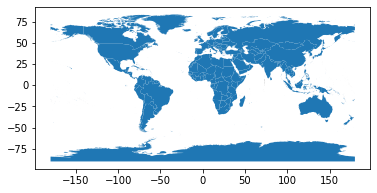

In [31]:
countries.plot()

<AxesSubplot:>

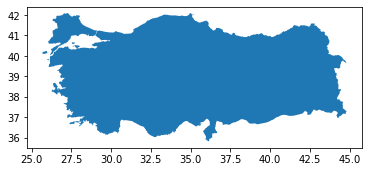

In [32]:
turkey = countries[countries["ADMIN"] == "Turkey"]
turkey.plot()

In [33]:
turkey_gf = geopandas.read_file("C:\\Users\\evata\datascience\\Turkey_population_with_geopandas-main\\Turkey_population_with_geopandas-main\\TUR_adm\\TUR_adm1.shp")

In [34]:
turkey_geo = turkey_gf.copy()

In [35]:
turkey_geo = turkey_geo[["NAME_1","geometry"]]

In [36]:
turkey_geo.rename(columns={"NAME_1":"provience"}, inplace=True)

<AxesSubplot:>

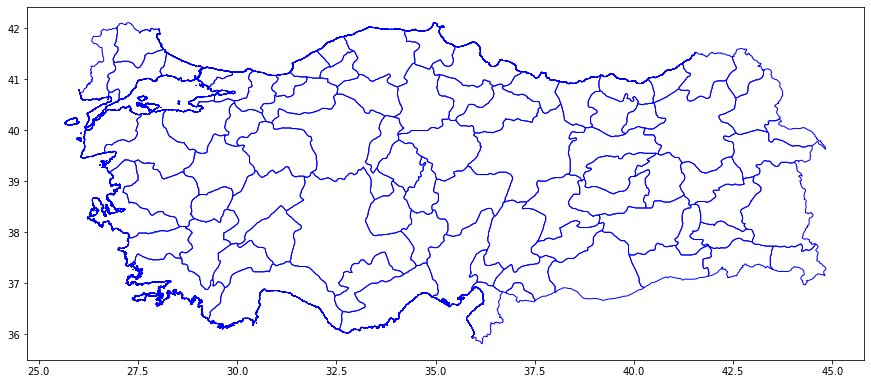

In [37]:
turkey_geo.plot(figsize=(15,15),edgecolor="b", facecolor="none")

In [38]:
turkey_geo.crs #crs EPSG:4326> tipinde

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [39]:
data_map_geo = gdf.to_crs("EPSG:4326")
# data_map_geo nun da crs EPSG:4326 olarak ayarlanır

In [40]:
data_map_geo.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [41]:
data_map_geo

,CELLCODE,EOFORIGIN,NOFORIGIN,geometry
0,10kmE563N201,5630000,2010000,"POLYGON ((25.36336 39.98642, 25.38486 40.07486..."
1,10kmE563N202,5630000,2020000,"POLYGON ((25.38486 40.07486, 25.40644 40.16329..."
2,10kmE563N203,5630000,2030000,"POLYGON ((25.40644 40.16329, 25.42811 40.25170..."
3,10kmE563N204,5630000,2040000,"POLYGON ((25.42811 40.25170, 25.44986 40.34010..."
4,10kmE563N205,5630000,2050000,"POLYGON ((25.44986 40.34010, 25.47170 40.42848..."
...,...,...,...,...
11518,10kmE732N228,7320000,2280000,"POLYGON ((44.89625 37.26753, 44.94110 37.34772..."
11519,10kmE732N229,7320000,2290000,"POLYGON ((44.94110 37.34772, 44.98609 37.42787..."
11520,10kmE733N225,7330000,2250000,"POLYGON ((44.86632 36.98624, 44.91080 37.06651..."
11521,10kmE733N226,7330000,2260000,"POLYGON ((44.91080 37.06651, 44.95543 37.14673..."


In [42]:
from shapely.geometry import Polygon, LineString, Point

In [43]:
data = data.loc[~np.isnan(data["lat"])]
data_merge_turkey = gpd.GeoDataFrame(
    data, geometry=gpd.points_from_xy(data.long, data.lat))

Text(0.5, 1.0, 'Earthquake')

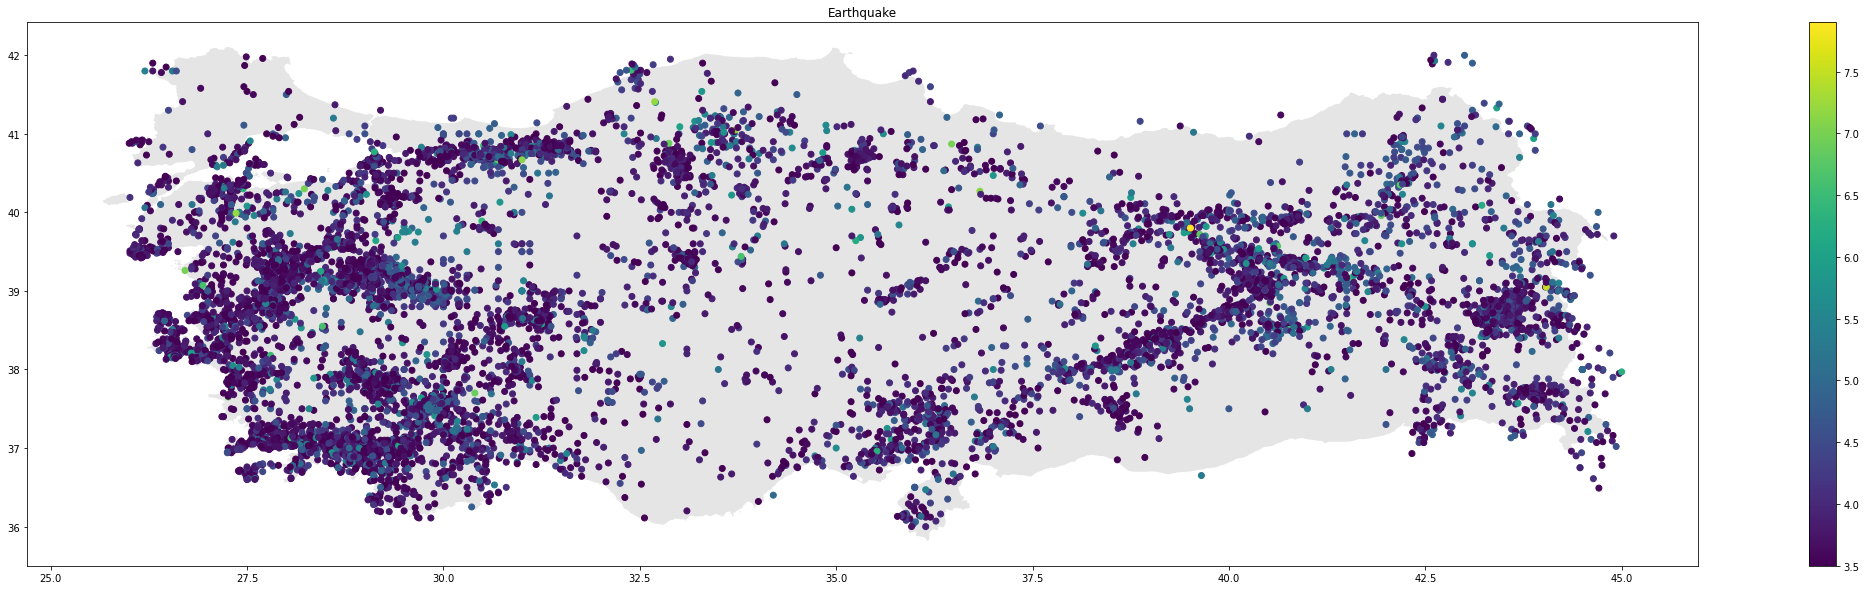

In [44]:
fig, ax = plt.subplots(figsize=(40, 10))
turkey_geo.plot(ax=ax, alpha=0.2, color="grey")
data_merge_turkey.plot(column="xm", ax=ax, legend=True)
plt.title("Earthquake")